In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

In [90]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [91]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [92]:
df.shape

(346479, 22)

In [93]:
df.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [94]:
df['baths'].value_counts()

1.0     178365
2.0     121302
1.5      24533
2.5      11814
3.0       4966
0.0       2835
4.0       1355
3.5        896
4.5        211
5.0        114
5.5         51
6.0         25
6.5          4
7.0          2
25.0         1
7.5          1
35.0         1
8.0          1
8.5          1
75.0         1
Name: baths, dtype: int64

In [95]:
df['type'].value_counts()

apartment          286303
house               29947
townhouse           14239
condo                5613
duplex               4539
manufactured         3819
cottage/cabin         770
loft                  616
flat                  470
in-law                153
land                    8
assisted living         2
Name: type, dtype: int64

In [96]:
df['laundry_options'].value_counts()

w/d in unit           118627
w/d hookups            67941
laundry on site        52949
laundry in bldg        32513
no laundry on site      3278
Name: laundry_options, dtype: int64

In [97]:
df['parking_options'].value_counts()

off-street parking    115612
attached garage        36428
carport                35048
detached garage        15314
street parking         14370
no parking              2882
valet parking            143
Name: parking_options, dtype: int64

<AxesSubplot: >

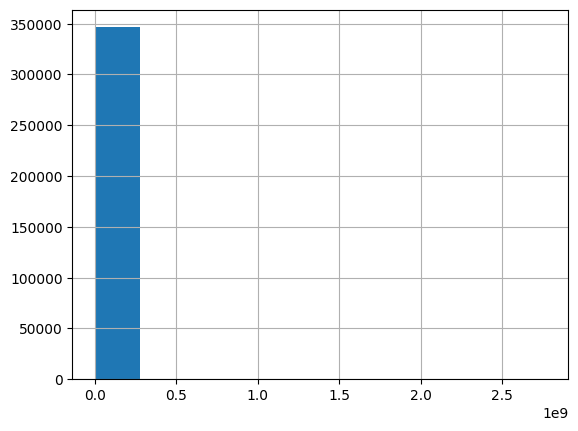

In [98]:
df['price'].hist()

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'sqfeet'}>,
        <AxesSubplot: title={'center': 'beds'}>],
       [<AxesSubplot: title={'center': 'baths'}>,
        <AxesSubplot: title={'center': 'cats_allowed'}>,
        <AxesSubplot: title={'center': 'dogs_allowed'}>,
        <AxesSubplot: title={'center': 'smoking_allowed'}>],
       [<AxesSubplot: title={'center': 'wheelchair_access'}>,
        <AxesSubplot: title={'center': 'electric_vehicle_charge'}>,
        <AxesSubplot: title={'center': 'comes_furnished'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

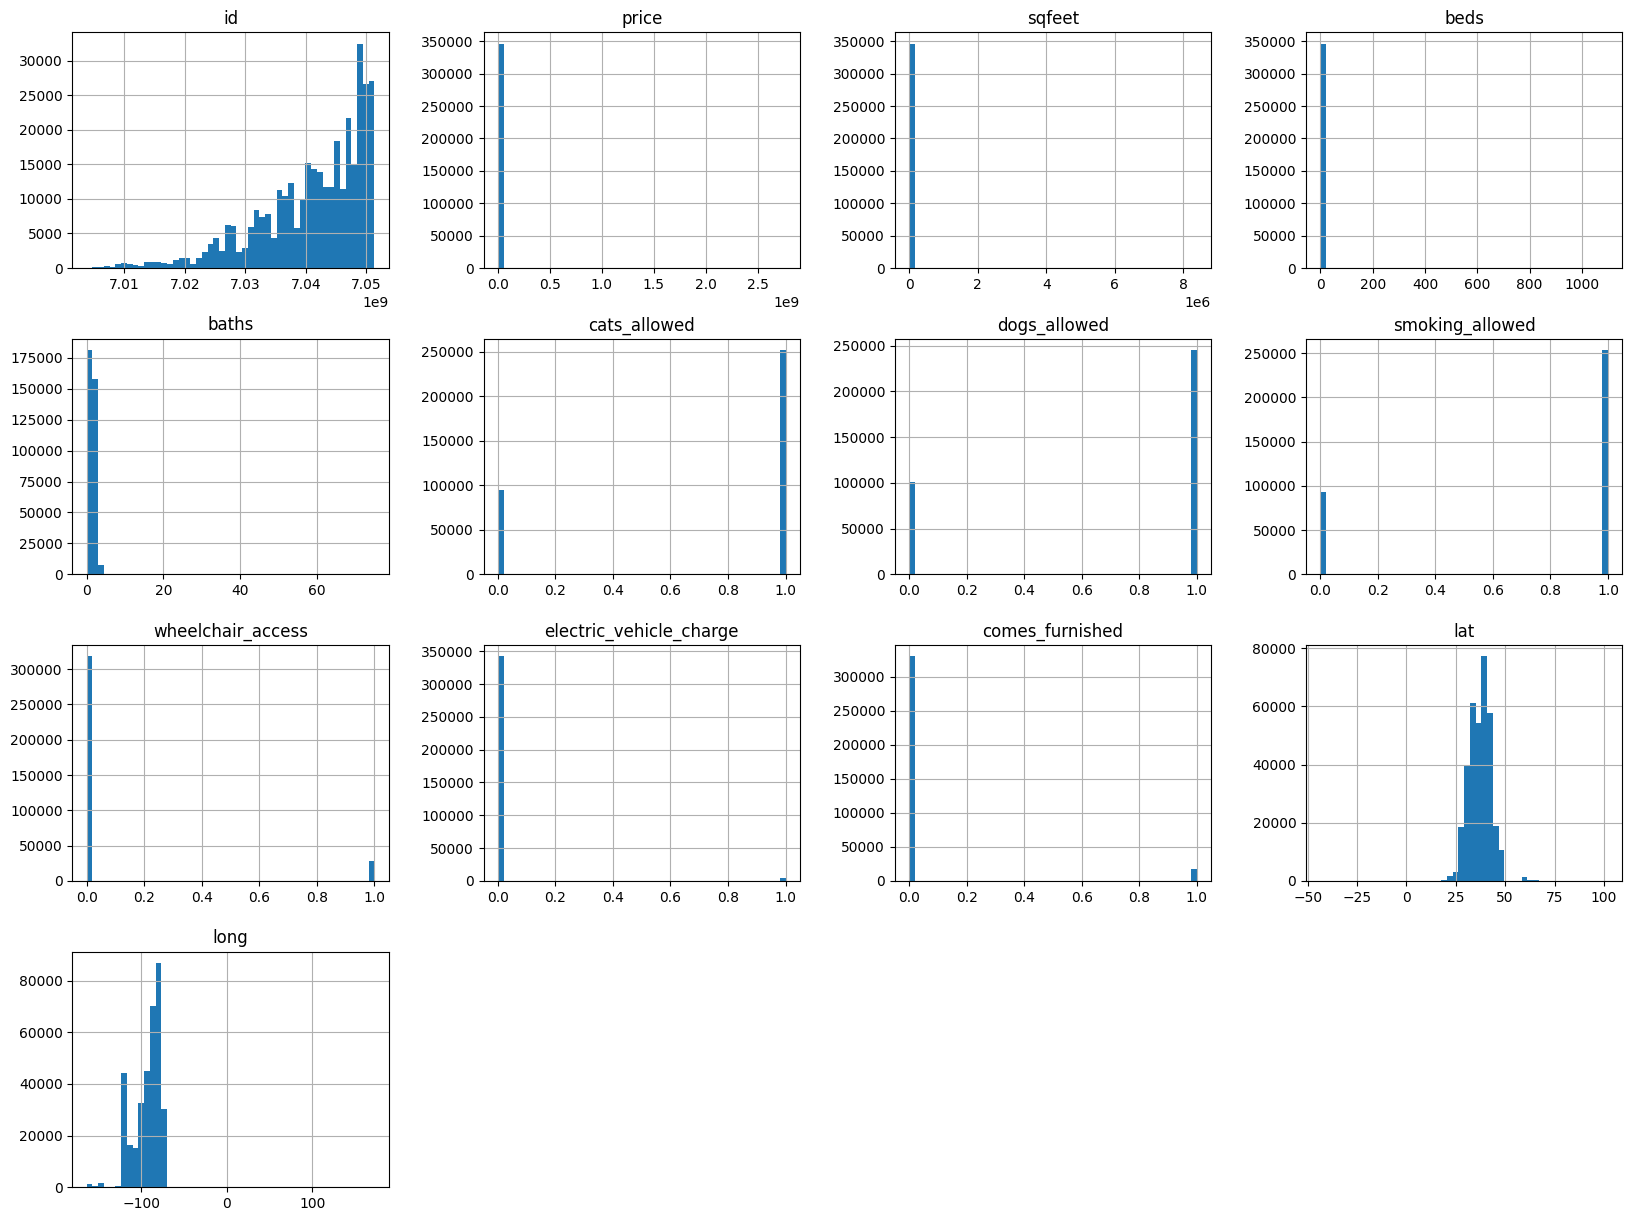

In [99]:
df.hist(bins=50, figsize=(20,15))

In [100]:
condiciones = [(df['price'] <= 999) , (df['price'] > 999)]
valores = ['1','0']
df['category_price'] = np.select(condiciones, valores)
df['category_price'].value_counts()

0    185825
1    160654
Name: category_price, dtype: int64

TRANFORMACION


In [101]:
df.isnull().values.any()

True

In [102]:
len(df)

346479

In [103]:
df.drop('url', axis=1, inplace=True)
df.drop('region_url', axis=1, inplace=True)
df.drop('image_url', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)

In [104]:
df = df.dropna()
len(df)

212304

In [105]:
#convertimos los valores categoricos en numericos
from sklearn.preprocessing import OrdinalEncoder
Ord = OrdinalEncoder()
Ord.fit_transform(df[['region', 'type', 'laundry_options', 'parking_options']])

array([[ 33.,   6.,   4.,   2.],
       [ 64.,   0.,   4.,   1.],
       [236.,   0.,   3.,   4.],
       ...,
       [ 65.,   0.,   3.,   4.],
       [238.,   0.,   4.,   2.],
       [ 42.,   0.,   4.,   4.]])

In [106]:
Ord.categories_

[array(['SF bay area', 'abilene', 'akron / canton', 'albany',
        'albuquerque', 'altoona-johnstown', 'amarillo', 'ames',
        'anchorage / mat-su', 'ann arbor', 'annapolis',
        'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens',
        'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield',
        'baltimore', 'baton rouge', 'battle creek',
        'beaumont / port arthur', 'bellingham', 'bemidji', 'bend',
        'billings', 'binghamton', 'birmingham', 'bismarck', 'bloomington',
        'bloomington-normal', 'boise', 'boone', 'boston', 'boulder',
        'bowling green', 'bozeman', 'brainerd', 'brownsville', 'brunswick',
        'buffalo', 'butte', 'cape cod / islands', 'catskills',
        'cedar rapids', 'central NJ', 'central louisiana',
        'central michigan', 'champaign urbana', 'charleston', 'charlotte',
        'charlottesville', 'chattanooga', 'chautauqua', 'chicago', 'chico',
        'chillicothe', 'cincinnati', 'clarksville', 'cleveland',
        

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

In [108]:
df.head(2)

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price
0,7048013474,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.225,0
1,7043931179,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.780,0


In [109]:
df.dtypes

id                           int64
region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
lat                        float64
long                       float64
category_price              object
dtype: object

In [110]:
numericas = ["price", "sqfeet", "beds", "baths"]
categoricas = ['region', 'type', 'laundry_options', 'parking_options']

In [111]:
trans_n = Pipeline( steps= [ ('scaler', StandardScaler()) ])
trans_c = Pipeline( steps= [ ('odinal', OrdinalEncoder())])

In [112]:
transformaciones = ColumnTransformer( [ ('num', trans_n,numericas) , ('cat',trans_c,categoricas)])

Preparemos las muestras

In [113]:
#X=df.drop('price', axis=1)

In [114]:
#Y=df['price']

In [115]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)

In [116]:
#X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

In [117]:
df.shape

(212304, 18)

In [118]:
df_train = df.dropna()
df_test = df_test.dropna()

In [127]:
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification

C:\Users\juanp\AppData\Local\Temp\ipykernel_19644\2653501115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr(method='spearman')


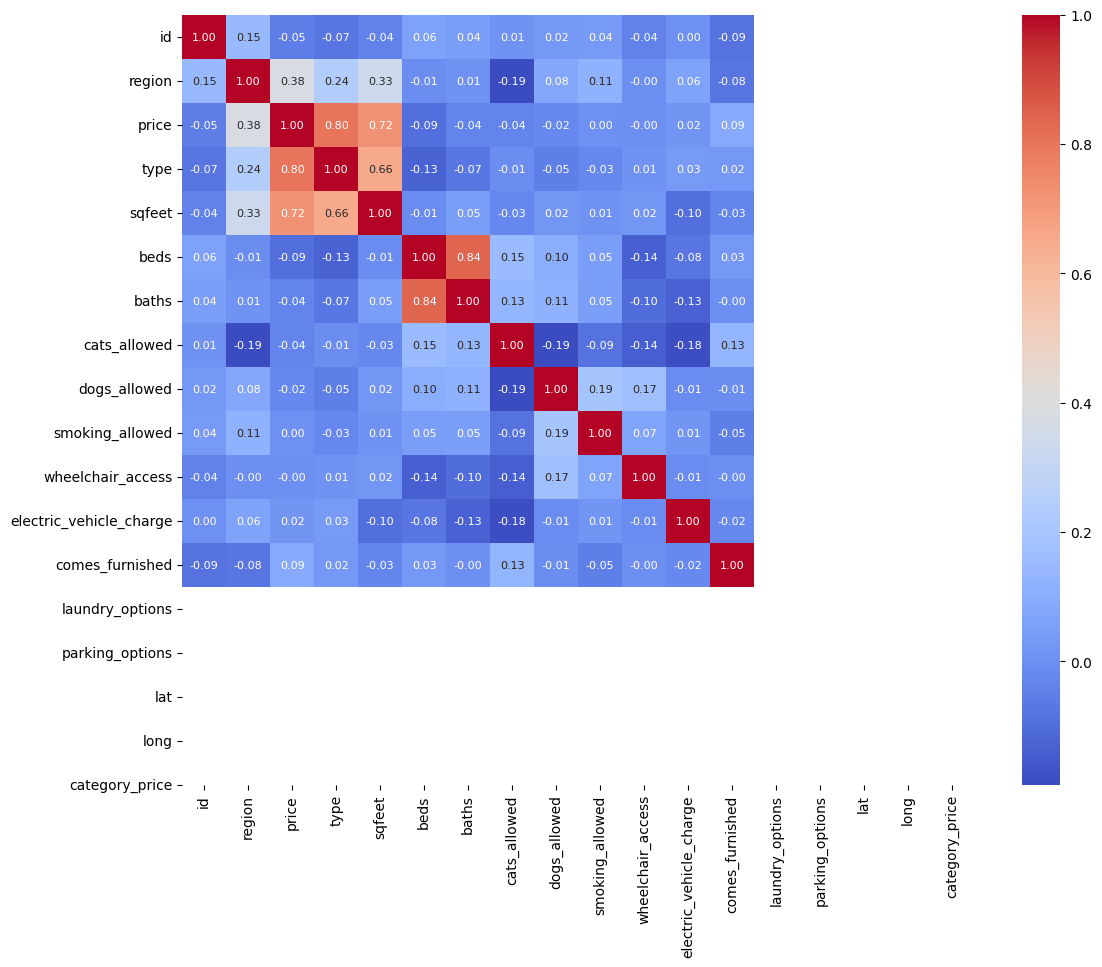

In [120]:
corr = df_train.corr(method='spearman')
plt.figure(figsize=(18,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= df_train.columns, 
           yticklabels= df_train.columns,
           cmap= 'coolwarm')

plt.show()

C:\Users\juanp\AppData\Local\Temp\ipykernel_19644\2504920362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr(method='pearson')


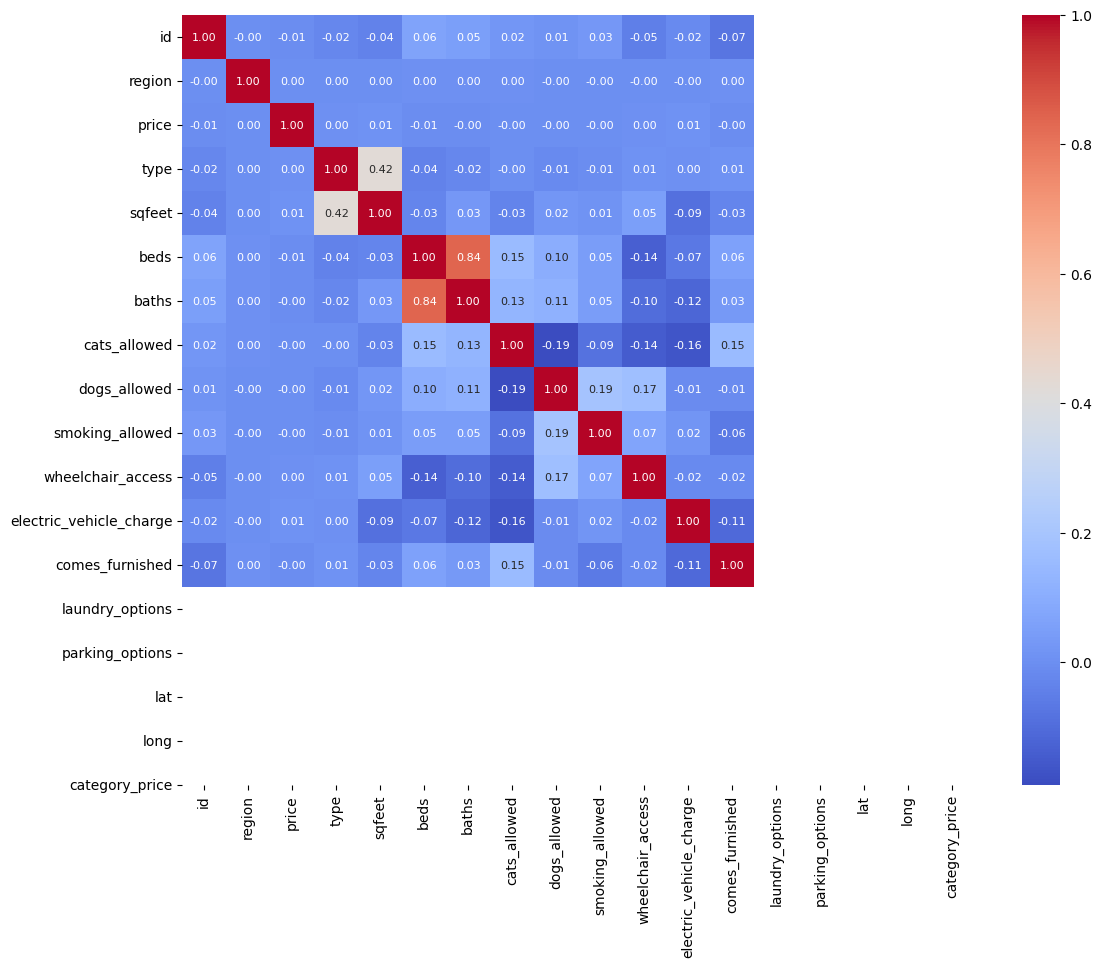

In [121]:
corr = df_train.corr(method='pearson')
plt.figure(figsize=(18,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= df_train.columns, 
           yticklabels= df_train.columns,
           cmap= 'coolwarm')

plt.show()

In [122]:
df_test['category_price'] = ''

In [123]:
df_test.shape

(23666, 22)

In [124]:
df_train.shape

(212304, 18)

In [125]:
df_train.columns

Index(['id', 'region', 'price', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'category_price'],
      dtype='object')

In [126]:
X = df_train.drop(columns=['category_price']) 
                                           
y = df_train['category_price'] 

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth = 30)
clf_dt.fit(X_train , y_train)
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
parametros = {'criterion':['gini'],'max_depth': np.arange(40)}

dt_gs = DecisionTreeClassifier()

clf_dt_gs = GridSearchCV(dt_gs, param_grid=parametros, scoring='accuracy', cv=5)

clf_dt_gs.fit(X_train, y_train)

In [ ]:
y_pred_dt_gs = clf_dt_gs.predict(X_test)
print(accuracy_score(y_test, y_pred_dt_gs))
print(recall_score(y_test, y_pred_dt_gs))

In [ ]:
df_train.drop(['id','smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','laundry_options_le', 'parking_options_le'], axis=1, inplace=True)
df_test.drop(['id','smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','laundry_options_le', 'parking_options_le'], axis=1, inplace=True)

In [ ]:
X = df_train.drop(columns=['category_price']) 
                                           
y = df_train['category_price'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf_dt = DecisionTreeClassifier(max_depth = 30)
clf_dt.fit(X_train , y_train)
y_pred_dt = clf_dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))

In [ ]:
pd.DataFrame(y_pred_dt).to_csv('supervisado.csv', index = False)